In [8]:
# Data Handling
import os
import datetime
import random
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# For Neural Network Model
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU
from tensorflow.keras.optimizers import Adam, SGD, Ftrl, RMSprop, Adagrad
from tensorflow.keras.callbacks import TensorBoard

**RUNNING MODEL ON RAW DATA VS NORMALIZED DATA**

In [9]:
%matplotlib inline
%load_ext tensorboard

In [10]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

2021-10-28 15:17:22.084706: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-10-28 15:17:22.084763: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-10-28 15:17:22.087105: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [11]:
def load_quickdraw10(file = './quickdraw10.npz'):
    '''
    Retrieves the quickdraw dataset and separates into training and testing classes
    
    Parameters:
    ------------
    file: str: location of quickdraw file on local machine
    
    Returns:
    --------
    X_train: numpy array list[list[int]]]: pixel values for all images that the model will be trained on
    X_test: numpy array list[list[int]]: pixel values for all images that the model will test predictions on
    y_train: numpy array list[int]: list of answer values for what number the picture represents; used in training
    y_test: numpy array list[int]: list of answer values for what the picture represents; used to determine model acc
    '''
    data = np.load(file)

    X = data['arr_0']
    Y = data['arr_1']
        
    X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True)

    return X_train, X_test, y_train, y_test


def create_model(lr=.01, opt='adam'):
    '''
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float: Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string: Name of optimizer to use
        
    Returns
    -------
    model: keras object: A compiled keras model 
    '''
    optimizer_choices = {'adam':Adam(learning_rate = lr), 'sgd': SGD(learning_rate = lr),
                         'ftrl': Ftrl(learning_rate = lr), 'rmsprop': RMSprop(learning_rate = lr),
                         'adagrad': Adagrad(learning_rate = lr)}
                                            
    learning_rate_choices = [.01, .005, .015, .001]
                                     
    if lr not in learning_rate_choices:
        print(f'{lr} is not a valid option. Defaulting to .01 learning rate')
        lr = .01                           
    
    if opt in optimizer_choices:
        opt = optimizer_choices[opt]
    else: 
        print ("{} is not a valid option. Defaulting to Adam optimizer".format(opt))
        opt = Adam(learning_rate=lr)
    
    # build model here
    model = Sequential([Dense(750, input_dim=784, activation='sigmoid'),
                        Dense(250, activation='sigmoid'),
                        Dense(10, activation='softmax')])
    
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

def fit_model(model, X_train, X_test, y_train, y_test, workers = -2, epochs = 10,
              batch_size = 32, verbose = 1, callbacks = [tensorboard]):
    '''
    Fits our neural network model onto the dataset
    
    Parameters:
    -----------
    model: keras object: a compiled keras model
    X_train: numpy array list[list[int]]]: pixel values for all images that the model will be trained on
    X_test: numpy array list[list[int]]: pixel values for all images that the model will test predictions on
    y_train: numpy array list[int]: list of answer values for what number the picture represents; used in training
    y_test: numpy array list[int]: list of answer values for what the picture represents; used to determine model acc
    workers: int: number of machines to use while running the model
    epochs: int: number of iterations the model should undergo while training
    batch_size: int: number of inputs to handle at at time
    verbose: bool: whether or not we get detailed information
    
    Returns:
    fitted neural network model
    '''
    
    return model.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     workers = workers,
                     epochs = epochs,
                     batch_size = batch_size,
                     verbose = verbose)

def normalize_data(X_train, X_test):
    '''
    normalizes the data in our set
    
    Parameters:
    -----------
    X_train: numpy array list[list[int]]]: pixel values for all images that the model will be trained on
    X_test: numpy array list[list[int]]: pixel values for all images that the model will test predictions on
    
    Returns:
    ----------
    X_train_scaled: numpy array list[list[int]]: normalized pixel values for images the model will be trained on
    X_test_scaled: numpy array list[list[int]]: normalized pixel values for images the model will test predictions on
    '''
    # Normalize your training and test sets 
    # save normalized data to X_train_scaled and X_test_scaled
    max_value = 255
    X_train_scaled, X_test_scaled = (X_train / max_value), (X_test / max_value)

    return X_train_scaled, X_test_scaled


In [5]:
# Load the dataset
X_train, X_test, y_train, y_test = load_quickdraw10()

# Compile the model 
model_raw = create_model(lr = .001, opt = 'adam')

# Fit model onto data
fit_model(model_raw, X_train, X_test, y_train, y_test, epochs = 5)

2021-10-19 15:21:57.387767: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-19 15:21:57.427703: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
2344/2344 [==============================] - 12s 5ms/step - loss: 1.0033 - accuracy: 0.6823 - val_loss: 0.7573 - val_accuracy: 0.7671
Epoch 2/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.7540 - accuracy: 0.7660 - val_loss: 0.7049 - val_accuracy: 0.7816
Epoch 3/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.7026 - accuracy: 0.7769 - val_loss: 0.6829 - val_accuracy: 0.7855
Epoch 4/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.6793 - accuracy: 0.7853 - val_loss: 0.6477 - val_accuracy: 0.7969
Epoch 5/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.6434 - accuracy: 0.7939 - val_loss: 0.6509 - val_accuracy: 0.7977


In [6]:
# Normalize the data and create and fit model onto normalized data
X_train_scaled, X_test_scaled = normalize_data(X_train, X_test)

# Compile the model 
model_normalized = create_model(lr = .001, opt = 'adam')

# Fit model onto data
fit_model(model_normalized, X_train_scaled, X_test_scaled, y_train, y_test, epochs = 5)

Epoch 1/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.9352 - accuracy: 0.7057 - val_loss: 0.5623 - val_accuracy: 0.8315
Epoch 2/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.4997 - accuracy: 0.8468 - val_loss: 0.4752 - val_accuracy: 0.8534
Epoch 3/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.4011 - accuracy: 0.8777 - val_loss: 0.4090 - val_accuracy: 0.8774
Epoch 4/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.3415 - accuracy: 0.8970 - val_loss: 0.4029 - val_accuracy: 0.8789
Epoch 5/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.2836 - accuracy: 0.9148 - val_loss: 0.3923 - val_accuracy: 0.8854


In [7]:
model_raw.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 750)               588750    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               187750    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2510      
Total params: 779,010
Trainable params: 779,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_normalized.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 750)               588750    
_________________________________________________________________
dense_4 (Dense)              (None, 250)               187750    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 779,010
Trainable params: 779,010
Non-trainable params: 0
_________________________________________________________________


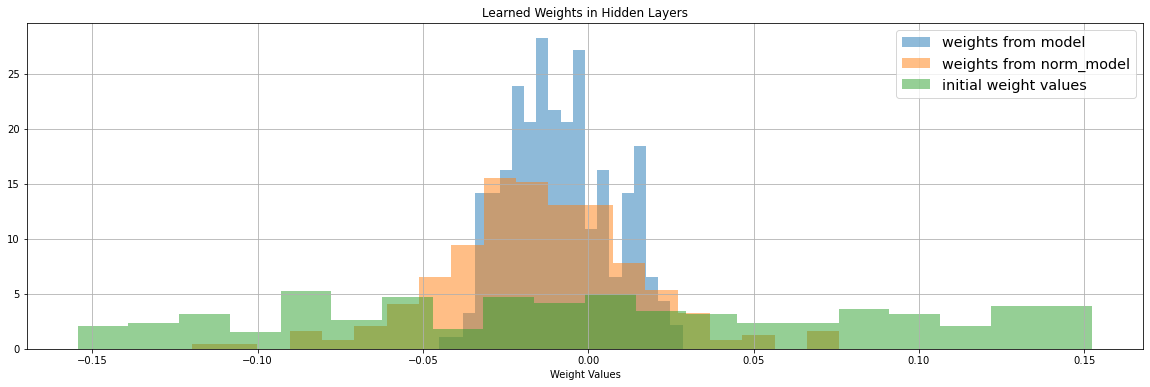

In [9]:
'''Comparing the Weights in the Final layer of Raw and Normal with Initialized Values'''

# Default for keras to randomly select weight values is GlorotUniform
initializer = tf.keras.initializers.GlorotUniform(seed=1234)
initial_weight_values = initializer(shape=(1, 250))

# Final weight & value matrices from normalized model
layer = model_normalized.get_layer(name="dense_4")
bias_norm, weights_norm = layer.get_weights()

# Final weight & value matrices from non-normalized model
layer = model_raw.get_layer(name="dense_1")
bias, weights = layer.get_weights()

# Visualization of the Weights for each
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

plt.hist(weights, bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="initial weight values", density=True);
plt.legend(fontsize="x-large");

**BATCH SIZE COMPARISONS**

In [10]:
model_bt32 = fit_model(create_model(lr = .001), X_train_scaled, X_test_scaled, y_train,
                       y_test, batch_size = 32, epochs = 5)

Epoch 1/5
2344/2344 [==============================] - 12s 5ms/step - loss: 0.9285 - accuracy: 0.7116 - val_loss: 0.5522 - val_accuracy: 0.8314
Epoch 2/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.5115 - accuracy: 0.8430 - val_loss: 0.4502 - val_accuracy: 0.8630
Epoch 3/5
2344/2344 [==============================] - 12s 5ms/step - loss: 0.4069 - accuracy: 0.8747 - val_loss: 0.4179 - val_accuracy: 0.8747
Epoch 4/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.3387 - accuracy: 0.8966 - val_loss: 0.4060 - val_accuracy: 0.8788
Epoch 5/5
2344/2344 [==============================] - 11s 5ms/step - loss: 0.2843 - accuracy: 0.9131 - val_loss: 0.3971 - val_accuracy: 0.8825


In [11]:
model_bt64 = fit_model(create_model(lr = .001), X_train_scaled, X_test_scaled, y_train,
                       y_test, batch_size = 64, epochs = 5)

Epoch 1/5
1172/1172 [==============================] - 11s 9ms/step - loss: 1.0035 - accuracy: 0.6884 - val_loss: 0.5896 - val_accuracy: 0.8233
Epoch 2/5
1172/1172 [==============================] - 10s 8ms/step - loss: 0.5510 - accuracy: 0.8324 - val_loss: 0.4951 - val_accuracy: 0.8500
Epoch 3/5
1172/1172 [==============================] - 10s 8ms/step - loss: 0.4548 - accuracy: 0.8621 - val_loss: 0.4598 - val_accuracy: 0.8622
Epoch 4/5
1172/1172 [==============================] - 9s 8ms/step - loss: 0.3875 - accuracy: 0.8840 - val_loss: 0.4226 - val_accuracy: 0.8735
Epoch 5/5
1172/1172 [==============================] - 10s 8ms/step - loss: 0.3393 - accuracy: 0.8955 - val_loss: 0.4027 - val_accuracy: 0.8808


In [12]:
model_bt128 = fit_model(create_model(lr = .001), X_train_scaled, X_test_scaled,
                        y_train, y_test, batch_size = 128, epochs = 5)

Epoch 1/5
586/586 [==============================] - 6s 10ms/step - loss: 1.1203 - accuracy: 0.6572 - val_loss: 0.6479 - val_accuracy: 0.8045
Epoch 2/5
586/586 [==============================] - 6s 10ms/step - loss: 0.6083 - accuracy: 0.8174 - val_loss: 0.5491 - val_accuracy: 0.8341
Epoch 3/5
586/586 [==============================] - 6s 10ms/step - loss: 0.5059 - accuracy: 0.8467 - val_loss: 0.4805 - val_accuracy: 0.8546
Epoch 4/5
586/586 [==============================] - 6s 10ms/step - loss: 0.4312 - accuracy: 0.8700 - val_loss: 0.4578 - val_accuracy: 0.8605
Epoch 5/5
586/586 [==============================] - 6s 10ms/step - loss: 0.3871 - accuracy: 0.8838 - val_loss: 0.4401 - val_accuracy: 0.8677


In [13]:
model_bt512 = fit_model(create_model(lr = .001), X_train_scaled, X_test_scaled, y_train,
                        y_test, batch_size = 512, epochs = 5)

Epoch 1/5
147/147 [==============================] - 5s 32ms/step - loss: 1.4768 - accuracy: 0.5334 - val_loss: 0.7855 - val_accuracy: 0.7702
Epoch 2/5
147/147 [==============================] - 4s 30ms/step - loss: 0.7559 - accuracy: 0.7753 - val_loss: 0.6853 - val_accuracy: 0.7974
Epoch 3/5
147/147 [==============================] - 4s 30ms/step - loss: 0.6645 - accuracy: 0.8038 - val_loss: 0.6138 - val_accuracy: 0.8195
Epoch 4/5
147/147 [==============================] - 4s 30ms/step - loss: 0.5906 - accuracy: 0.8255 - val_loss: 0.5656 - val_accuracy: 0.8314
Epoch 5/5
147/147 [==============================] - 4s 30ms/step - loss: 0.5397 - accuracy: 0.8377 - val_loss: 0.5244 - val_accuracy: 0.8416


In [18]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([model_bt64, model_bt128, model_bt32, model_bt512], ["64_", "128_", "256_", "512_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.776826,0.765000,0.589636,0.82332,0,64_
1,0.532674,0.838160,0.495101,0.84996,1,64_
2,0.444741,0.864707,0.459752,0.86220,2,64_
3,0.384425,0.885067,0.422634,0.87352,3,64_
4,0.337764,0.897240,0.402739,0.88076,4,64_


ValueError: cannot reindex from a duplicate axis

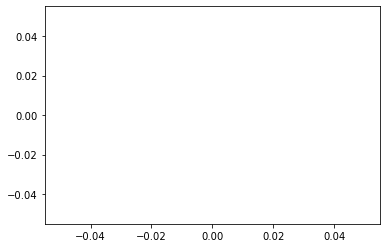

In [15]:
model = create_model(lr=1)
lr_1 = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
model = create_model(lr=.1)
lr_01 = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
model = create_model(lr=.01)
lr_001 = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
model = create_model(lr=.001)
lr_0001 = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
model = create_model(lr=.0001)
lr_00001 = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
import seaborn as sns
import pandas as pd

lrs = []

for exp, result in zip([lr_01, lr_001, lr_0001, lr_00001], [".01_", ".001_", ".0001_", ".00001_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rates'] = result

    lrs.append(df)

df_lr = pd.concat(lrs)
df_lr['Learning Rates'] = df_lr['Learning Rates'].astype('str')
df_lr.head()

In [ ]:
model = create_model(lr=.0001, opt='sgd')
opt_sgd = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
model = create_model(lr=.0001, opt='ftrl')
opt_ftrl = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
model = create_model(lr=.0001, opt='adagrad')
opt_adagrad = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
model = create_model(lr=.0001, opt='rmsprop')
opt_rmsprop = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=256, 
          verbose=1, 
          callbacks=[tensorboard])

In [ ]:
optimizers = []

for exp, result in zip([opt_sgd, opt_ftrl, opt_adagrad, opt_rmsprop], ["sgd", "ftrl", "adagrad", "rmsprop"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result

    optimizers.append(df)

df_opt = pd.concat(optimizers)
df_opt['Optimizer'] = df_opt['Optimizer'].astype('str')
df_opt.head()